In [3]:
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
!pip install geopandas rioxarray earthpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 72.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 82.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 63.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 49.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 69.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 10.5

In [5]:
import geopandas as gpd
import rioxarray as rxr
import earthpy as et

In [7]:
sns.set(font_scale=1.5, style="darkgrid")

In [9]:
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

Extracted output to /home/codespace/earth-analytics/data/colorado-flood/.


In [10]:
dem_pre_path = os.path.join("colorado-flood",
                            "spatial",
                            "boulder-leehill-rd",
                            "pre-flood",
                            "lidar",
                            "pre_DTM.tif")

dtm_pre_arr = rxr.open_rasterio(dem_pre_path)
dtm_pre_arr

<xarray.DataArray (band: 1, y: 2000, x: 4000)> Size: 32MB
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -3.4028235e+38
    scale_factor:   1.0
    add_offset:     0.0

In [11]:
dtm_pre_arr.rio.crs

CRS.from_epsg(32613)

In [12]:
dtm_pre_arr.rio.bounds()

(472000.0, 4434000.0, 476000.0, 4436000.0)

In [13]:
dtm_pre_arr.rio.nodata

-3.4028235e+38

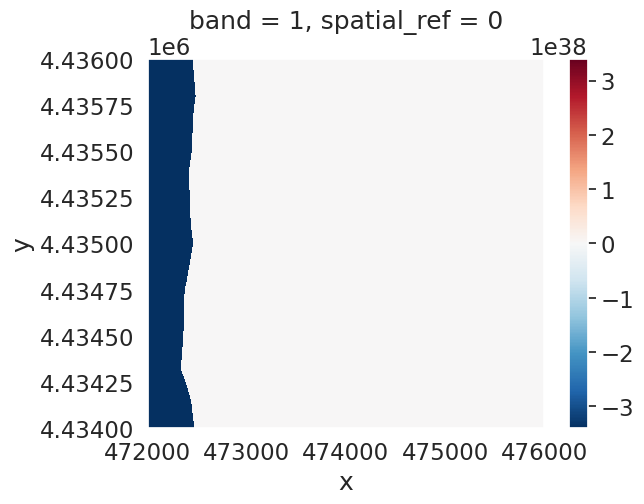

In [14]:
dtm_pre_arr.plot()
plt.show()

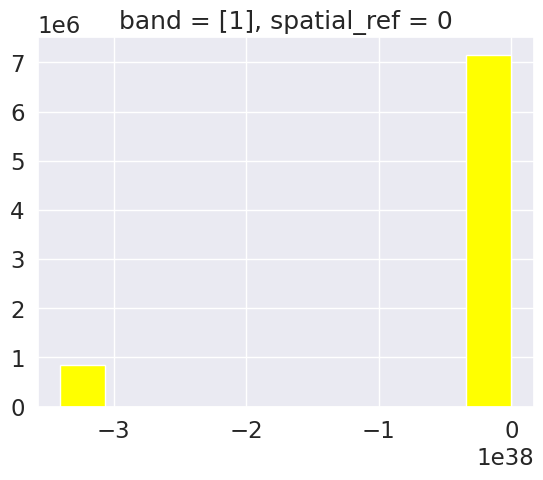

In [15]:
dtm_pre_arr.plot.hist(color="Yellow")
plt.show()

In [16]:
np.nanmin(dtm_pre_arr.values)

-3.4028235e+38

In [17]:
np.nanmax(dtm_pre_arr.values)

2087.43

In [18]:
dtm_pre_arr.shape

(1, 2000, 4000)

In [20]:
dtm_pre_arr = rxr.open_rasterio(dem_pre_path, masked=True).squeeze()

dtm_pre_arr.shape

(2000, 4000)

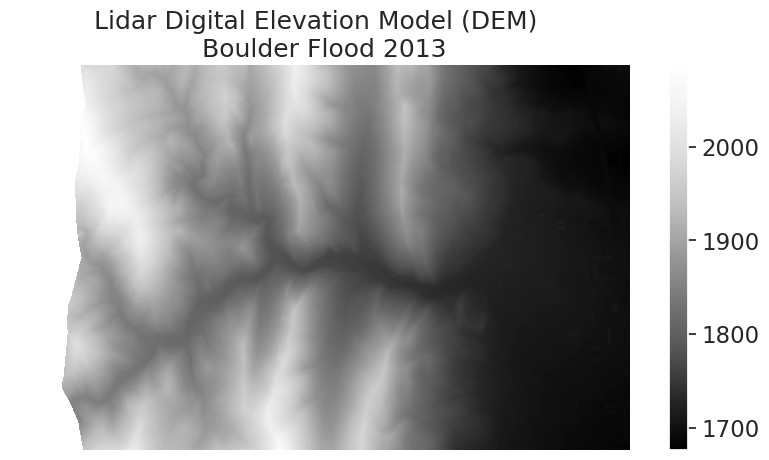

In [22]:
f, ax = plt.subplots(figsize=(10, 5))
dtm_pre_arr.plot(cmap="Greys_r", ax=ax)
ax.set_title("Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013")
ax.set_axis_off()
plt.show()

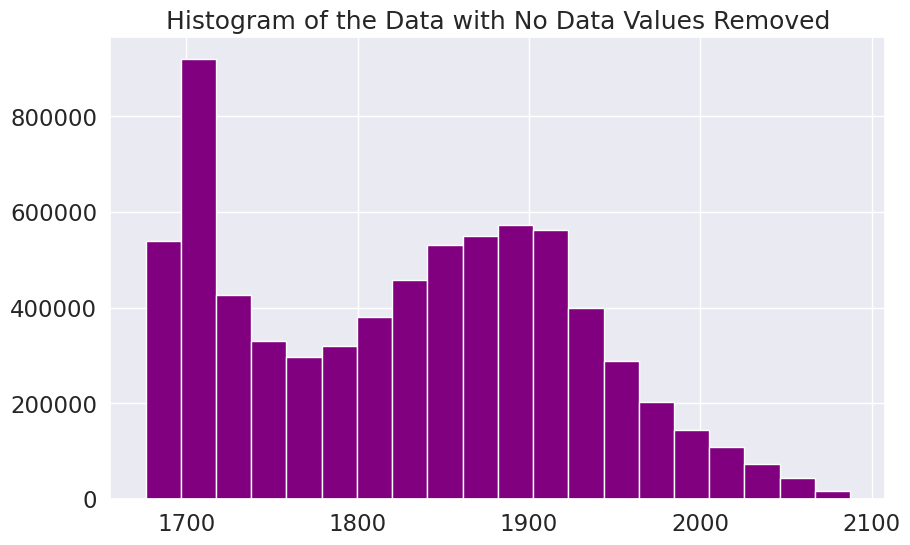

In [23]:
f, ax = plt.subplots(figsize=(10, 6))
dtm_pre_arr.plot.hist(color="purple", bins=20)
ax.set_title("Histogram of the Data with No Data Values Removed")
plt.show()

In [24]:
np.nanmin(dtm_pre_arr.data)

1676.21

In [25]:
np.nanmax(dtm_pre_arr.data)

2087.43

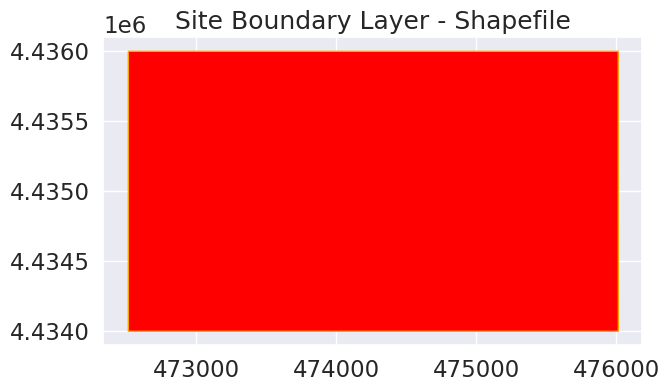

In [26]:
site_bound_path = os.path.join("colorado-flood", "spatial", "boulder-leehill-rd", "clip-extent.shp")

site_bound_shp = gpd.read_file(site_bound_path)


f, ax = plt.subplots(figsize=(8,4))

site_bound_shp.plot(color='red', edgecolor='orange',  ax=ax)
ax.set(title="Site Boundary Layer - Shapefile")
plt.show()

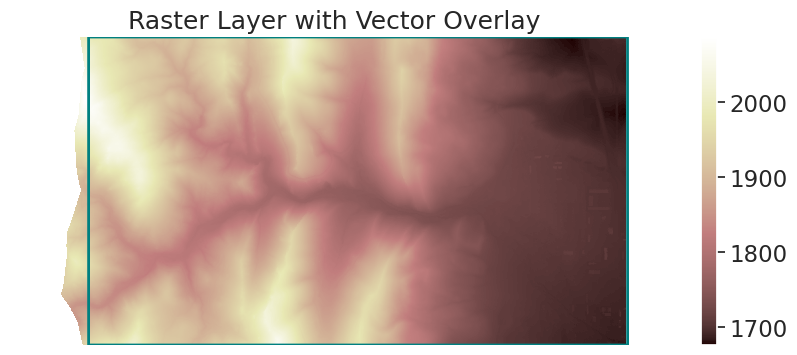

In [27]:
f, ax = plt.subplots(figsize=(11, 4))

dtm_pre_arr.plot.imshow(cmap="pink",
                        ax=ax)
site_bound_shp.plot(color='None',  edgecolor='teal', linewidth=2, ax=ax, zorder=4)

ax.set(title="Raster Layer with Vector Overlay")
ax.axis('off')
plt.show()